**MOUNT DATA ZIP ROCKPAPERSCISSOR YANG SUDAH DI UPLOAD KE GOOGLE DRIVE**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**EXTRACT FILE ZIP ROCKPAPERSCISSORS**

In [ ]:
import zipfile,os
local_zip = '/content/drive/MyDrive/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/project/tmp')
zip_ref.close()

In [ ]:
base_dir = '/content/project/tmp'
train_dir = '/content/project/tmp/train'
validation_dir = '/content/project/tmp/val'

classes_train = os.listdir(train_dir)
classes_val = os.listdir(validation_dir)

print(classes_train)
print(classes_val)


['scissors', 'rock', 'paper']
['scissors', 'rock', 'paper']


**DATA AUGMENTASI**



PROCESSING TRAIN DATA


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(rescale=1.0/255,
                                     horizontal_flip=True,
                                     vertical_flip=True,
                                     rotation_range=20,
                                     shear_range=0.2,
                                     fill_mode='nearest')

In [ ]:
train_data = train_generator.flow_from_directory(train_dir, # path folder data latihan/traindata
                                                 target_size=(150, 150), # menyeragamkan ukuran gambar untuk proses training
                                                 batch_size=32, # jumlah data yang diproses dalam sekali iterasi
                                                 class_mode='categorical' # dataset terdiri dari 3 class maka akan diproses menggunakan categorical
                                                 )

Found 1308 images belonging to 3 classes.


PROCESSING VALDATION DATA

In [ ]:
val_generator = ImageDataGenerator(rescale=1.0/255,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   rotation_range=20,
                                   shear_range=0.2,
                                   fill_mode='nearest')
val_data = val_generator.flow_from_directory(validation_dir, # path folder data validation
                                             target_size=(150,150), # menyeragamkan ukuran gambar untuk proses data validasi
                                             batch_size=32, # jumlah data yang akan diproses dalam sekali iterasi
                                             class_mode='categorical') # data validasi terdiri dari 3 class maka akan diproses menggunakan categorical

Found 880 images belonging to 3 classes.


**MODELLING**

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')])
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_34 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_35 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_35 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_36 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_36 (MaxPooli  (None, 17, 17, 128)     

**COMPILE MODEL**

In [ ]:
model.compile(optimizer=tf.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

**TRAINING MODEL**

In [ ]:
history = model.fit(train_data,
                    steps_per_epoch=25,
                    validation_data=val_data,
                    epochs=20,
                    validation_steps=5,
                    verbose=2)

Epoch 1/20
25/25 - 53s - loss: 1.1175 - accuracy: 0.4475 - val_loss: 0.8767 - val_accuracy: 0.7875 - 53s/epoch - 2s/step
Epoch 2/20
25/25 - 52s - loss: 0.7282 - accuracy: 0.7212 - val_loss: 0.4154 - val_accuracy: 0.8625 - 52s/epoch - 2s/step
Epoch 3/20
25/25 - 50s - loss: 0.3181 - accuracy: 0.8950 - val_loss: 0.4680 - val_accuracy: 0.8625 - 50s/epoch - 2s/step
Epoch 4/20
25/25 - 52s - loss: 0.3063 - accuracy: 0.8932 - val_loss: 0.3106 - val_accuracy: 0.9062 - 52s/epoch - 2s/step
Epoch 5/20
25/25 - 52s - loss: 0.2403 - accuracy: 0.9234 - val_loss: 0.1793 - val_accuracy: 0.9375 - 52s/epoch - 2s/step
Epoch 6/20
25/25 - 51s - loss: 0.2071 - accuracy: 0.9372 - val_loss: 0.2794 - val_accuracy: 0.8938 - 51s/epoch - 2s/step
Epoch 7/20
25/25 - 51s - loss: 0.2151 - accuracy: 0.9347 - val_loss: 0.1208 - val_accuracy: 0.9625 - 51s/epoch - 2s/step
Epoch 8/20
25/25 - 51s - loss: 0.1844 - accuracy: 0.9397 - val_loss: 0.0990 - val_accuracy: 0.9812 - 51s/epoch - 2s/step
Epoch 9/20
25/25 - 50s - loss: 0

Saving HQSUE6P23pvLctuy.png to HQSUE6P23pvLctuy.png
1/1 [==============================] - 0s 55ms/step
HQSUE6P23pvLctuy.png
Paper


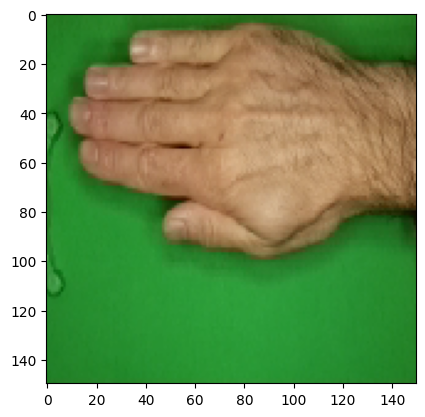

In [ ]:
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
from keras.preprocessing import image
%matplotlib inline


upload = files.upload()
for fn in upload.keys():
    path = fn
    img = image.load_img(path, target_size=(150, 150))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(fn)
    if classes[0, 0] != 0:
        print('Paper')
    elif classes[0, 1] != 0:
        print('Rock')
    else:
        print('Scissors')